In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("amazon.csv")

df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [2]:
# 📌 Cell 2: Clean and covert data carefully

df_clean = df.copy()

# Define functions
def clean_price(price_str):
    if pd.isna(price_str): return np.nan
    return float(price_str.replace("₹", "").replace(",", "").strip())

def clean_percent(pct_str):
    if pd.isna(pct_str): return np.nan
    return float(pct_str.replace("%", "").strip())

def clean_count(count_str):
    if pd.isna(count_str): return np.nan
    return int(str(count_str).replace(",", "").strip())

# Apply those functions
df_clean['actual_price'] = df_clean['actual_price'].apply(clean_price)
df_clean['discounted_price'] = df_clean['discounted_price'].apply(clean_price)
df_clean['discount_percentage'] = df_clean['discount_percentage'].apply(clean_percent)
df_clean['rating'] = pd.to_numeric(df_clean['rating'], errors='coerce')
df_clean['rating_count'] = df_clean['rating_count'].apply(clean_count)

# Create new columns
df_clean['discount_amount'] = df_clean['actual_price'] - df_clean['discounted_price']
df_clean['is_heavily_discounted'] = df_clean['discount_percentage'] > 50

# Results
df_clean[['actual_price', 'discounted_price', 'discount_percentage', 'rating', 'rating_count', 'discount_amount', 'is_heavily_discounted']].head()

,actual_price,discounted_price,discount_percentage,rating,rating_count,discount_amount,is_heavily_discounted
0,1099.0,399.0,64.0,4.2,24269.0,700.0,True
1,349.0,199.0,43.0,4.0,43994.0,150.0,False
2,1899.0,199.0,90.0,3.9,7928.0,1700.0,True
3,699.0,329.0,53.0,4.2,94363.0,370.0,True
4,399.0,154.0,61.0,4.2,16905.0,245.0,True


In [3]:
# Check for missing values
missing = df_clean.isnull().sum().sort_values(ascending=False)

# Summary statistics for numeric columns
summary = df_clean.describe()

print("🔍 Missing values:")
print(missing)

print("\n📊 Summary statistics:")
print(summary)

🔍 Missing values:
rating_count             2
rating                   1
product_id               0
user_name                0
discount_amount          0
product_link             0
img_link                 0
review_content           0
review_title             0
review_id                0
user_id                  0
product_name             0
about_product            0
discount_percentage      0
actual_price             0
discounted_price         0
category                 0
is_heavily_discounted    0
dtype: int64

📊 Summary statistics:
       discounted_price   actual_price  discount_percentage       rating  \
count       1465.000000    1465.000000          1465.000000  1464.000000   
mean        3125.310874    5444.990635            47.691468     4.096585   
std         6944.304394   10874.826864            21.635905     0.291674   
min           39.000000      39.000000             0.000000     2.000000   
25%          325.000000     800.000000            32.000000     4.000000   
50% 

In [4]:
# Ensure all values are strings, then clean and convert
df_clean['rating_count'] = df_clean['rating_count'].astype(str).str.replace(",", "").astype(float)

# Fill missing values
df_clean['rating'].fillna(df_clean['rating'].median(), inplace=True)
df_clean['rating_count'].fillna(df_clean['rating_count'].median(), inplace=True)

# Check again
df_clean[['rating', 'rating_count']].isnull().sum()

rating          0
rating_count    0
dtype: int64

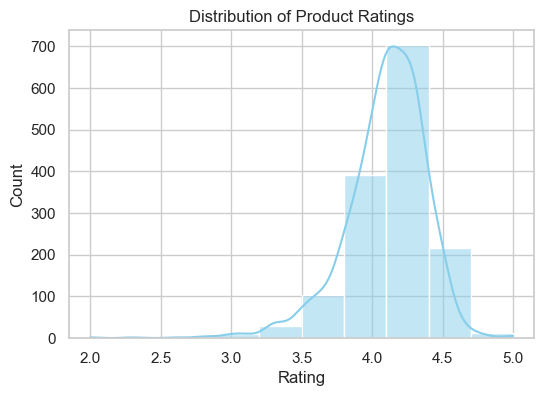

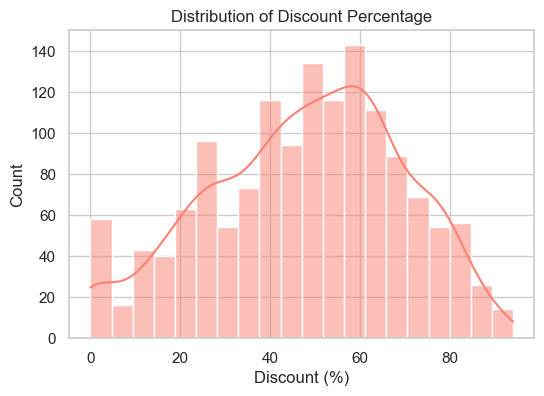

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Plot rating distribution
plt.figure(figsize=(6, 4))
sns.histplot(df_clean['rating'], bins=10, kde=True, color='skyblue')
plt.title("Distribution of Product Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

# Plot discount percentage
plt.figure(figsize=(6, 4))
sns.histplot(df_clean['discount_percentage'], bins=20, kde=True, color='salmon')
plt.title("Distribution of Discount Percentage")
plt.xlabel("Discount (%)")
plt.ylabel("Count")
plt.show()

In [7]:
# 📦 Save cleaned data to use in the next notebook
import os

# Create processed folder if it doesn't exist
os.makedirs("data/processed", exist_ok=True)

# Save the cleaned dataset
df_clean.to_csv("data/processed/amazon_clean.csv", index=False)